# Linear Regression

# Linear Regression Theory

The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two dimensional space (between two variables, in this case), we get a straight line.

# Model Representation

In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. Here the input variable is called Independent Variable and the output variable is called Dependent Variable. We can define this linear relationship as follows:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>Y</mi>
  <mo>=</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mn>1</mn>
  </msub>
  <mi>X</mi>
</math>

The β1 is called a scale factor or coefficient and β0 is called bias coefficient. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the line equation y=mx+b with m=β1(Slope) and b=β0(Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients? That’s the learning procedure. We can find these using different approaches. One is called Ordinary Least Square Method and other one is called Gradient Descent Approach. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression 

# Ordinary Least Square Method

we are going to approximate the relationship between X and Y to a line. Let’s say we have few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.

<img src="reg.png">

And you can see a line in the image. That’s what we are going to accomplish. And we want to minimize the error of our model. A good model will always have least error. We can find this line by reducing the error. The error of each point is the distance between line and that point. This is illustrated as follows.

<img src="2.png">

And total error of this model is the sum of all errors of each point. ie.

<img src="3.png">

https://www.wikiwand.com/en/Ordinary_least_squares

# Implementation

We are going to use a dataset containing head size and brain weight of different people. This data set has other features. But, we will not use them in this model..

In [16]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


As you can see there are 237 values in the training set. We will find a linear relationship between Head Size and Brain Weights. So, now we will get these variables.

In [17]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

To find the values 
β
1
 and 
β
0
, we will need mean of X and Y. We will find these and the coeffients.

In [18]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


There we have our coefficients.

Brain Weight = 0.26342933948939945 + 325.57342104944223 * HeadSize

That is our linear model.

Now we will see this graphically

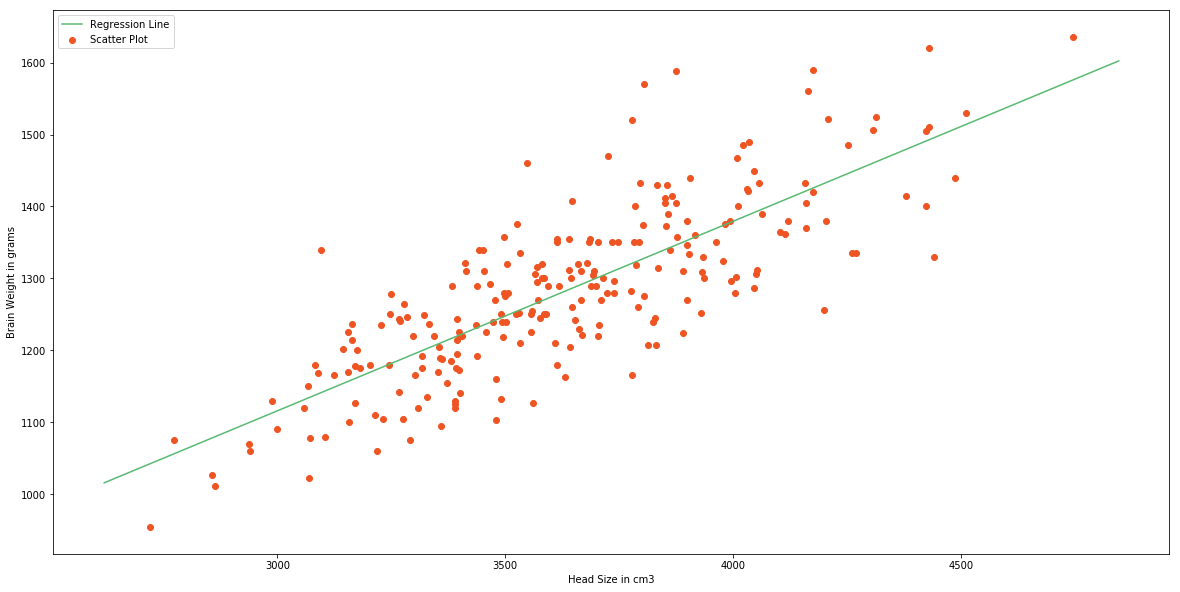

In [19]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use Root Mean Squared Error and Coefficient of Determination(
R
2
Score).

Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically,

<img src="rmse.png">

Here 
^
y
i
 is the ith predicted output values. Now we will find RMSE.

In [21]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


<img src="4.png">

In [22]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


0.63 is not so bad. Now we have implemented Simple Linear Regression Model using Ordinary Least Square Method. Now we will see how to implement the same model using scikit-learn

# The scikit-learn approach

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


You can see that this exactly equal to model we built from scratch, but simpler and less code.



Credit:
    
<a href="http://cs229.stanford.edu/notes/cs229-notes1.pdf">Linear Regression Notes by Andrew Ng</a>


https://www.coursera.org/learn/machine-learning -Machine Learning Course by Andrew Ng(Coursera) - Week 1

https://github.com/GSavitri/LinearRegression/blob/master/SimpleLinearRegression/LinearRegression_PredictSalary.ipynb

https://www.springboard.com/blog/linear-regression-in-python-a-tutorial/

https://mubaris.com/2017/09/28/linear-regression-from-scratch/

http://stackabuse.com/linear-regression-in-python-with-scikit-learn/

https://github.com/RahulVamusani/Data-science-projects/blob/master/linear%20regression/Linear%20regression.ipynb
